# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

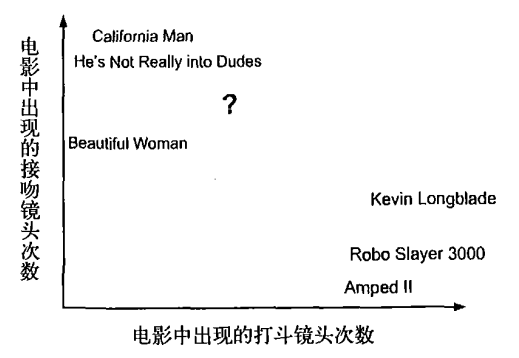

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

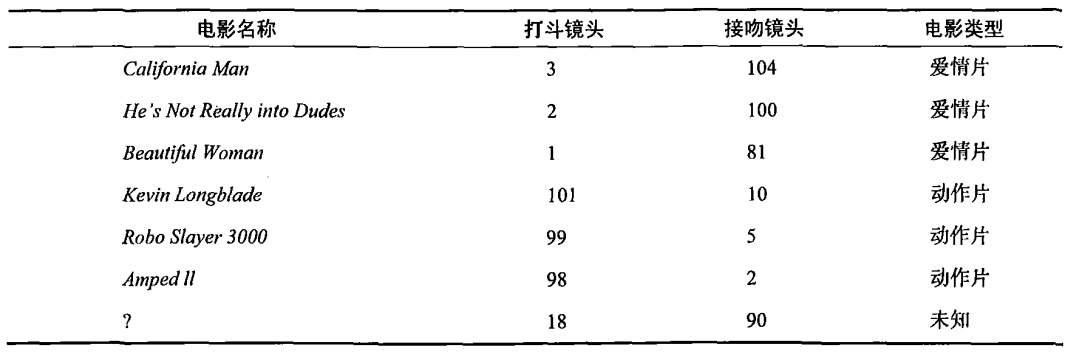

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

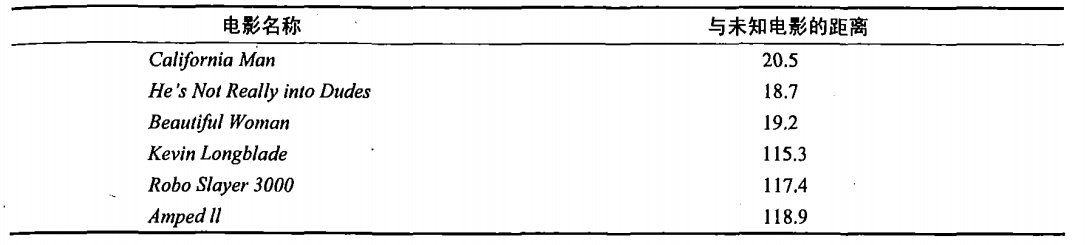

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie = pd.read_excel('../tests.xlsx', sheet_name=1)
movie

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


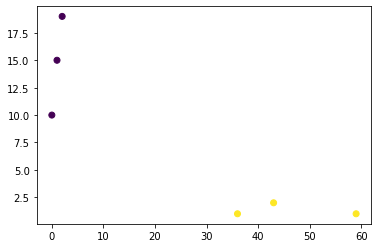

In [4]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[1,1,0,1,0,0])

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()
# 训练数据是样本,一定得是二维的.
knn.fit(movie[['武打镜头', '接吻镜头']], movie['分类情况'] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
X_test = np.array([[30, 2], [45, 3], [3, 15]])
y_ = knn.predict(X_test)
y_

array(['动作片', '动作片', '爱情片'], dtype=object)

In [8]:
# 准确率 score 
knn.score(movie[['武打镜头', '接吻镜头']], movie['分类情况'])

1.0

In [9]:
knn.score(X_test, ['动作片', '动作片', '爱情片'])

1.0

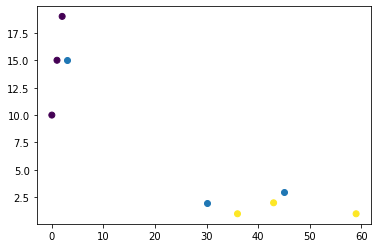

In [11]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[1,1,0,1,0,0])
plt.scatter(X_test[:,0], X_test[:,1],cmap='rainbow')

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

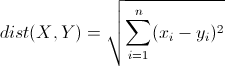

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [17]:
X_train = np.array([[180, 170, 43], [170, 100, 38], [174, 120, 42], [173, 160, 43], [165, 200, 42], [165, 120, 37], [155, 90, 36], [190, 180, 46], [160, 100, 38], [160, 120, 40]])
y_train = np.array(['男', '女 ', '男', '男', '男', '女', '女', '男', '女', '男'])

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
X_test = np.array([[175, 150, 43], [170, 140, 42], [158, 100, 37], [165, 80, 36], [180, 200, 43]])
y_ = knn.predict(X_test)
y_

array(['男', '男', '女', '女', '男'], dtype='<U2')

In [20]:
knn.score(X_train, y_train)

0.7

In [21]:
knn.predict(X_train)

array(['男', '女', '女', '男', '男', '女', '女', '男', '女', '女'], dtype='<U2')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [22]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
data = iris['data']
target = iris['target']


In [26]:
data.shape

(150, 4)

In [27]:
target.shape

(150,)

In [28]:
# 切割数据
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2) # 随机取的

In [30]:
X_train.shape

(120, 4)

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_ = knn.predict(X_test)
y_

array([2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2,
       2, 1, 2, 1, 1, 0, 0, 0])

In [34]:
y_test

array([2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 1, 0, 0, 0])

In [33]:
knn.score(X_test,y_test)

0.9333333333333333

In [35]:
knn.score(X_train, y_train)

0.9833333333333333

获取训练样本

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [36]:
# 从data中选取两个特征.
df = DataFrame(data=data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


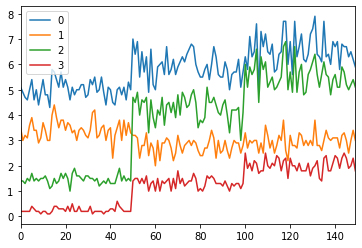

In [37]:
df.plot()

In [38]:
data = data[:,0:2]
data.shape

(150, 2)

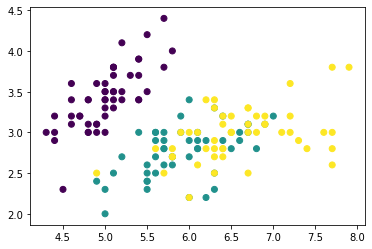

In [39]:
plt.scatter(data[:,0], data[:,1], c=target)

In [40]:
knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn.score(data, target)

0.8333333333333334

对数据进行预测

In [43]:
# 生成平面上的点来做预测数据.
xmin, xmax = data[:,0].min(), data[:,0].max()
ymin, ymax = data[:, 1].min(), data[:,1].max()
x,y = np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000)

# 范围变成面
X,Y = np.meshgrid(x,y)
# display(X,Y)
X_test = np.c_[X.ravel(), Y.ravel()]
X_test

array([[4.3       , 2.        ],
       [4.3036036 , 2.        ],
       [4.30720721, 2.        ],
       ...,
       [7.89279279, 4.4       ],
       [7.8963964 , 4.4       ],
       [7.9       , 4.4       ]])

In [44]:
X_test.shape

(1000000, 2)

In [45]:
y_ = knn.predict(X_test)

In [46]:
y_[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Wall time: 3.59 s


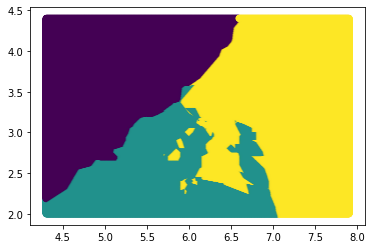

In [48]:
%time plt.scatter(X_test[:,0],  X_test[:,1], c=y_)

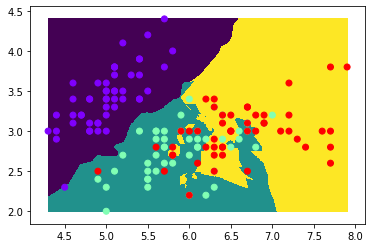

In [49]:
plt.pcolormesh(X, Y , y_.reshape((1000,1000)))
plt.scatter(data[:,0], data[:,1], c=target, cmap='rainbow')

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

获取数据

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度